In [1]:
%matplotlib inline

Estimated Gaussian noise standard deviation = 0.14796973198662736
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


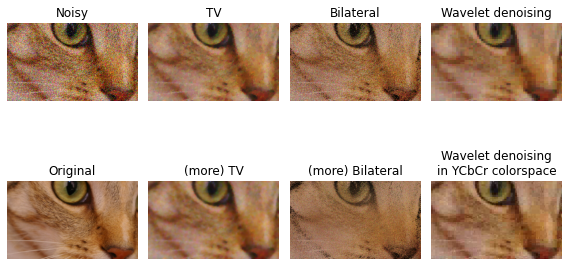

In [3]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'Original')

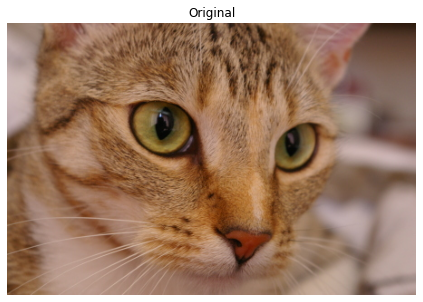

In [19]:
fig, ax = plt.subplots(figsize=(8, 5),
                       sharex=True, sharey=True)

ax.imshow(original)
ax.axis('off')
ax.set_title('Original')

Text(0.5, 1.0, 'Noisy')

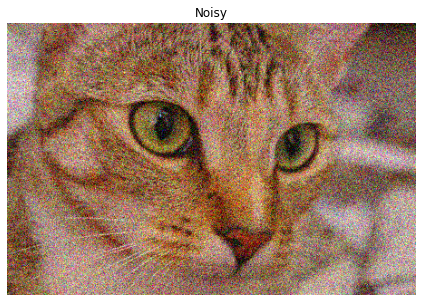

In [21]:
fig, ax = plt.subplots(figsize=(8, 5),
                       sharex=True, sharey=True)
sigma = 0.155
noisy = random_noise(original, var=sigma**2)

ax.imshow(noisy)
ax.axis('off')
ax.set_title('Noisy')

Text(0.5, 1.0, 'Wavelet denoising')

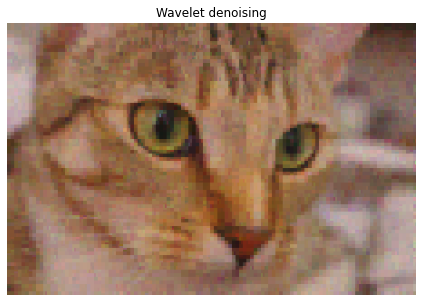

In [24]:

fig, ax = plt.subplots(figsize=(8, 5),
                       sharex=True, sharey=True)
sigma = 0.155
noisy = random_noise(original, var=sigma**2)
ax.imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax.axis('off')
ax.set_title('Wavelet denoising')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Wavelet denoising\nin YCbCr colorspace')

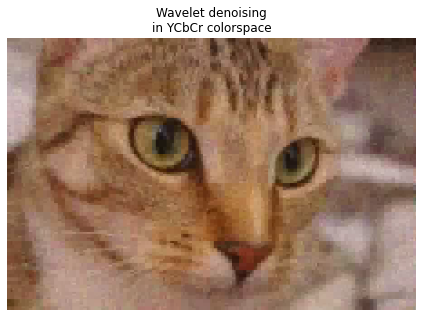

In [29]:

fig, ax = plt.subplots(figsize=(8, 5),
                       sharex=True, sharey=True)
sigma = 0.155
noisy = random_noise(original, var=sigma**2)
ax.imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax.axis('off')
ax.set_title('Wavelet denoising\nin YCbCr colorspace')

Text(0.5, 1.0, 'Bilateral')

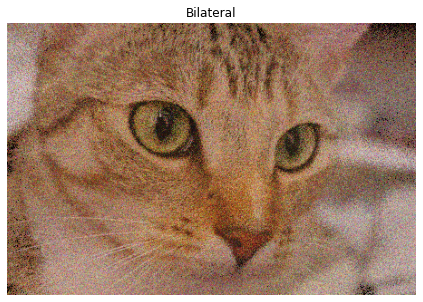

In [33]:
fig, ax = plt.subplots(figsize=(8, 5),
                       sharex=True, sharey=True)
sigma = 0.155
noisy = random_noise(original, var=sigma**2)
ax.imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax.axis('off')
ax.set_title('Bilateral')